## Real Estate - House Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

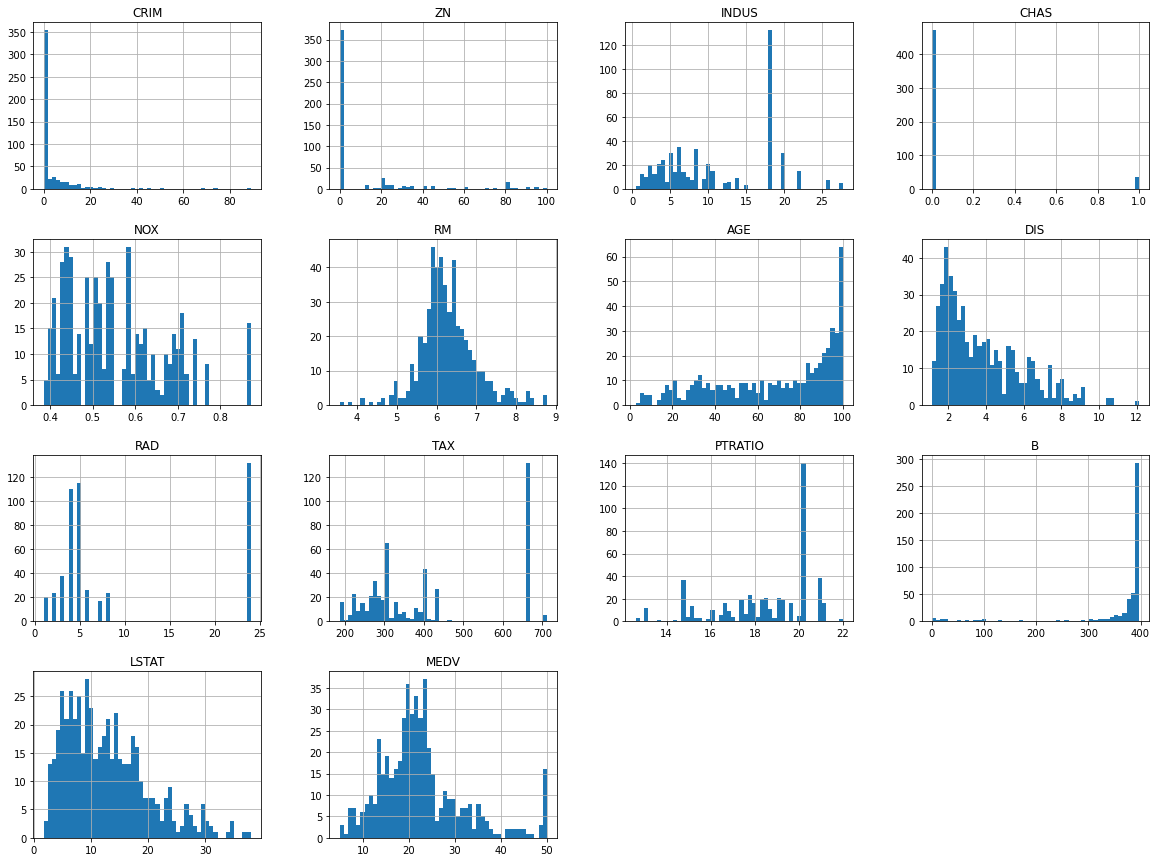

In [8]:
# # For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing, test_size=0.2, random_state=0)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [16]:
# 95/7

In [17]:
# 376/28

In [14]:
housing = strat_train_set.copy()

## Looking for Correlations

In [15]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.723664
B          0.326640
ZN         0.295445
DIS        0.229198
CHAS       0.163718
AGE       -0.347770
RAD       -0.393081
CRIM      -0.395603
NOX       -0.415604
INDUS     -0.458890
TAX       -0.481014
PTRATIO   -0.505297
LSTAT     -0.739293
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

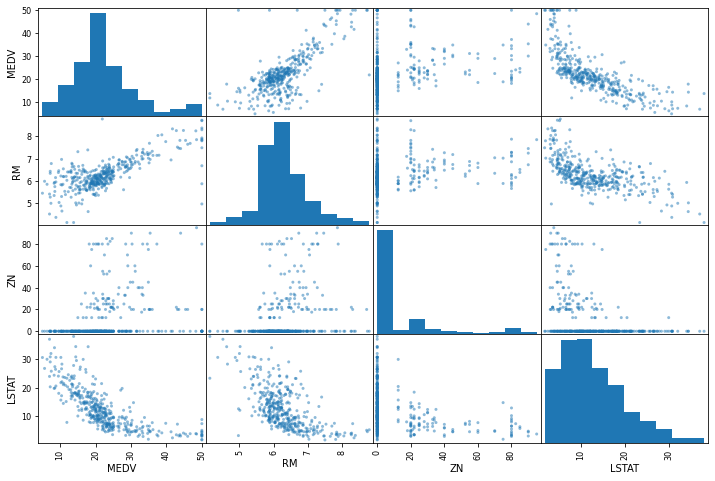

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

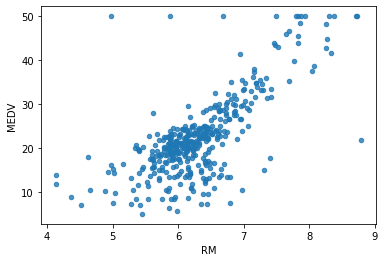

In [20]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combinations


In [21]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0,30.405405
24,0.75026,0.0,8.14,0,0.5380,5.924,94.1,4.3996,4,307,21.0,394.33,16.30,15.6,51.823093
379,17.86670,0.0,18.10,0,0.6710,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2,107.022336
479,14.33370,0.0,18.10,0,0.6140,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4,106.919249
325,0.19186,0.0,7.38,0,0.4930,6.431,14.7,5.4159,5,287,19.6,393.68,5.08,24.6,44.627585


In [23]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.723664
B          0.326640
ZN         0.295445
DIS        0.229198
CHAS       0.163718
AGE       -0.347770
RAD       -0.393081
CRIM      -0.395603
NOX       -0.415604
INDUS     -0.458890
TAX       -0.481014
PTRATIO   -0.505297
TAXRM     -0.567833
LSTAT     -0.739293
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

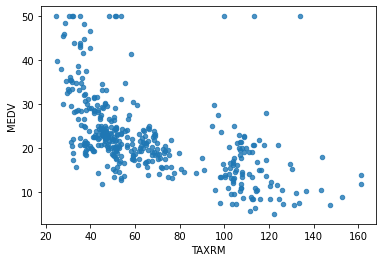

In [24]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [25]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [26]:
# To take care of missing attributes, we have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [27]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(399, 13)

In [28]:
housing.drop("RM", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(404, 12)

In [29]:
median = housing["RM"].median() # Compute median for Option 3

In [30]:
housing["RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

64     7.104
24     5.924
379    6.223
479    6.229
325    6.431
       ...  
455    6.525
59     5.927
417    5.304
140    6.174
493    5.707
Name: RM, Length: 404, dtype: float64

In [31]:
housing.shape

(404, 13)

In [32]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.689672,10.553218,11.082698,0.069307,0.552945,6.294301,68.629703,3.835586,9.470297,404.675743,18.495297,360.000198,12.609653
std,8.832484,21.762399,6.747763,0.254290,0.114465,0.695105,27.744041,2.117322,8.576707,166.169489,2.148507,85.863735,7.125562
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.083437,0.000000,5.190000,0.000000,0.453000,5.884500,45.550000,2.102700,4.000000,281.000000,17.400000,376.092500,7.197500
50%,0.258750,0.000000,8.560000,0.000000,0.532000,6.208000,76.600000,3.298600,5.000000,330.000000,19.100000,391.385000,11.170000
75%,3.489463,12.500000,18.100000,0.000000,0.624000,6.617000,94.100000,5.218725,24.000000,666.000000,20.200000,396.157500,16.992500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.58750e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.32000e-01,
       6.20800e+00, 7.66000e+01, 3.29860e+00, 5.00000e+00, 3.30000e+02,
       1.91000e+01, 3.91385e+02, 1.11700e+01])

In [35]:
X = imputer.transform(housing)

In [36]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.689672,10.553218,11.082698,0.069307,0.552945,6.293233,68.629703,3.835586,9.470297,404.675743,18.495297,360.000198,12.609653
std,8.832484,21.762399,6.747763,0.254290,0.114465,0.690846,27.744041,2.117322,8.576707,166.169489,2.148507,85.863735,7.125562
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.083437,0.000000,5.190000,0.000000,0.453000,5.887250,45.550000,2.102700,4.000000,281.000000,17.400000,376.092500,7.197500
50%,0.258750,0.000000,8.560000,0.000000,0.532000,6.208000,76.600000,3.298600,5.000000,330.000000,19.100000,391.385000,11.170000
75%,3.489463,12.500000,18.100000,0.000000,0.624000,6.608500,94.100000,5.218725,24.000000,666.000000,20.200000,396.157500,16.992500
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit-learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


## Creating a Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [40]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Real Estates

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [43]:
some_data = housing.iloc[:5]

In [44]:
some_labels = housing_labels.iloc[:5]

In [45]:
prepared_data = my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data)

array([31.748, 16.087, 10.999, 21.017, 24.638])

In [47]:
list(some_labels)

[33.0, 15.6, 10.2, 21.4, 24.6]

## Evaluating the model

In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [50]:
rmse

1.3071899515016663

## Using better evaluation technique - Cross Validation

In [51]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [52]:
rmse_scores

array([3.4811587 , 4.4204436 , 2.99653821, 3.39310948, 2.96140835,
       2.06462512, 3.04344782, 3.98988973, 4.43981747, 3.26100136])

In [53]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [54]:
print_scores(rmse_scores)

Scores: [3.4811587  4.4204436  2.99653821 3.39310948 2.96140835 2.06462512
 3.04344782 3.98988973 4.43981747 3.26100136]
Mean:  3.4051439836408965
Standard deviation:  0.6900496495948027


## Saving the model

In [55]:
from joblib import dump, load
dump(model, 'Dragon.pkl') 

['Dragon.pkl']

## Testing the model on test data

In [56]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [57]:
final_rmse

3.259702082501815

In [58]:
prepared_data[0]

array([-0.41604527,  0.31960611, -1.43969621, -0.27288841, -1.19699755,
        1.17504213, -0.32947699,  2.54755519, -0.75533878, -1.13684942,
        0.04879332,  0.38760272, -0.64069431])

## Using the model

In [60]:
from joblib import dump, load
import numpy as np
model = load('Dragon.pkl') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([24.377])

# Thank You